### **Stack Overflow Insights**

   
Cerca de 65 mil desenvolvedores, de  de 180 países, participaram da pesquisa anual do Stack Overflow. O **2020 Annual Developer Survey** avalia todos os aspectos da experiência de um desenvolvedor, desde a eduação até a busca de emprego e satisfação na carreira.  

A pesquisa foi realizada entre os dias 5 e 28 de fevereiro de 2020.   


Fonte dos dados: [Stack Overflow Insights](https://insights.stackoverflow.com/survey)      



In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
import textwrap


In [2]:
data = pd.read_csv('data/survey_results_public.csv', index_col='Respondent', na_values = ['no info', '.', 'NA', 'Missing'])
questions = pd.read_csv('data/survey_results_schema.csv', index_col='Column') 

In [3]:
pd.set_option('display.max_columns', 61)
pd.set_option('display.max_rows', 61)

In [4]:
# dicionário 
questions.head()

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...


In [5]:
# visualizando os dados
data.head(3)

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


In [6]:
# todas as colunas do df
data.columns

Index(['MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal',
       'ConvertedComp', 'Country', 'CurrencyDesc', 'CurrencySymbol',
       'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel',
       'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek',
       'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
       'Webframe

In [7]:
# selecionando as features
data = data[['MainBranch', 'Age', 'ConvertedComp', 'Country', 'DevType', 'EdLevel', 'Employment', 'Gender', 'JobFactors', 'JobSat', 
            'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'PlatformDesireNextYear', 'PlatformWorkedWith', 
            'UndergradMajor', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WorkWeekHrs', 'YearsCodePro']]

In [8]:
# renomeando a coluna ConvertedComp
data.rename(columns={'ConvertedComp': 'AnnualSalaryUSD'}, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64461 entries, 1 to 65112
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              64162 non-null  object 
 1   Age                     45446 non-null  float64
 2   AnnualSalaryUSD         34756 non-null  float64
 3   Country                 64072 non-null  object 
 4   DevType                 49370 non-null  object 
 5   EdLevel                 57431 non-null  object 
 6   Employment              63854 non-null  object 
 7   Gender                  50557 non-null  object 
 8   JobFactors              49349 non-null  object 
 9   JobSat                  45194 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  LanguageWorkedWith      57378 non-null  object 
 12  MiscTechDesireNextYear  42379 non-null  object 
 13  MiscTechWorkedWith      40314 non-null  object 
 14  PlatformDesireNextYear  50605 non-null

In [10]:
# substitui por valores numéricos
data['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51}, inplace=True)
data.dropna(subset=['YearsCodePro'], inplace=True)
data['YearsCodePro'] = data['YearsCodePro'].astype(int)

In [11]:
# estatísticas do df
data.describe()

,Age,AnnualSalaryUSD,WorkWeekHrs,YearsCodePro
count,36852.000000,3.462100e+04,40922.000000,46349.000000
mean,32.269242,1.037684e+05,40.788262,8.491812
std,8.855902,2.266323e+05,17.845422,7.905296
min,1.000000,0.000000e+00,1.000000,0.000000
25%,26.000000,2.466000e+04,40.000000,3.000000
50%,30.000000,5.404900e+04,40.000000,6.000000
75%,37.000000,9.500000e+04,44.000000,12.000000
max,279.000000,2.000000e+06,475.000000,51.000000


As colunas *Age* e *WorkWeekHrs* têm números impossiveis (outliers).        
Vamos corrigir esses dados limitando a valores mais aceitáveis:

In [12]:
# limita a idade entre 14 e 99 anos 
data = data.query("Age >= 14 & Age < 100") 

In [13]:
# limita ao máximo de horas em uma semana 
data = data[(data['WorkWeekHrs'] < 168)]

In [14]:
data.isnull().sum()

MainBranch                   0
Age                          0
AnnualSalaryUSD           5038
Country                      0
DevType                    402
EdLevel                    569
Employment                  54
Gender                     397
JobFactors                 807
JobSat                      50
LanguageDesireNextYear    1822
LanguageWorkedWith         192
MiscTechDesireNextYear    8099
MiscTechWorkedWith        9355
PlatformDesireNextYear    3394
PlatformWorkedWith        1656
UndergradMajor            2567
WebframeDesireNextYear    9466
WebframeWorkedWith        7762
WorkWeekHrs                  0
YearsCodePro                 0
dtype: int64

In [15]:
data.shape

(34961, 21)

### Perfil dos Devs    

O objetivo desta análise é obter insights sobre a **carreira de tecnologia**.    
Portanto, vamos selecionar apenas devs que atuam profissionalmente na área:



In [16]:
# filtrando os devs profissionais
data = data[data['MainBranch'] == 'I am a developer by profession']

In [17]:
data.shape

(31720, 21)

**País de Origem**

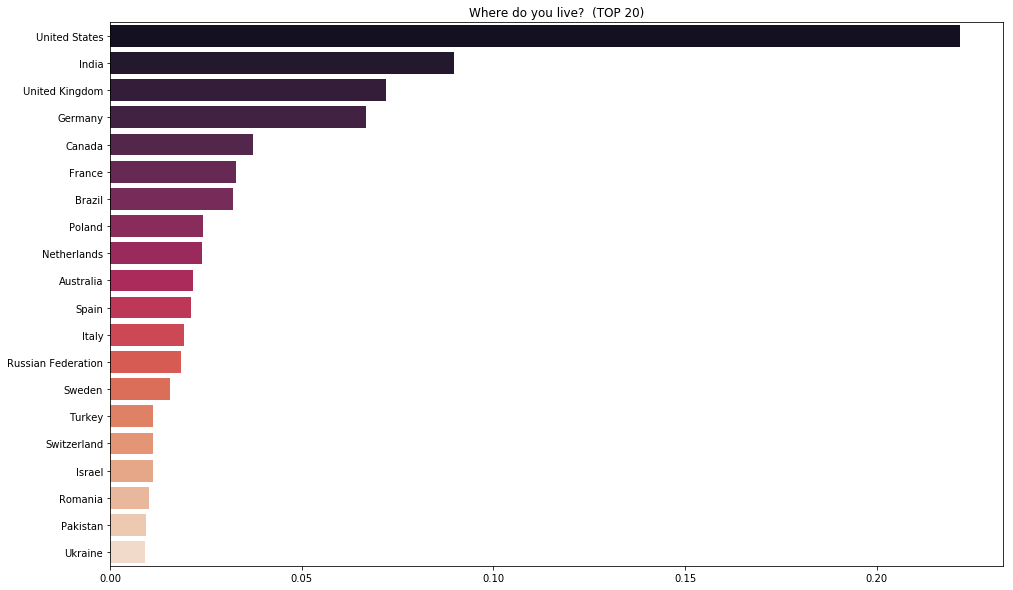


Total de países:  153


In [18]:
# top 20 países
country_count  = data['Country'].value_counts(normalize=True)
country_count = country_count[:20,]

plt.figure(figsize=(16, 10))
sns.barplot( country_count.values, country_count.index, palette="rocket")
plt.title(questions.loc['Country', 'QuestionText'] + '  (TOP 20)')
plt.show()

print('\nTotal de países: ', data['Country'].nunique())

**Gênero**

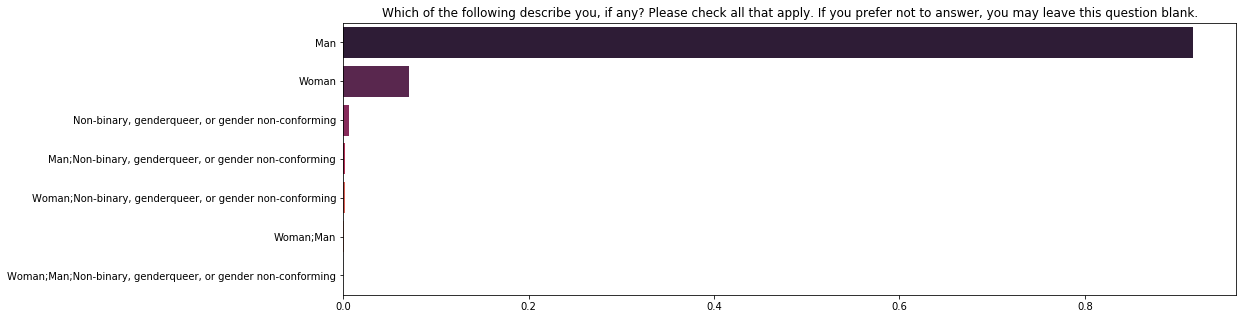

In [19]:
gender = data['Gender'].value_counts(normalize=True)

plt.figure(figsize=(16, 5))
sns.barplot( gender.values, gender.index, palette="rocket")
plt.title(questions.loc['Gender', 'QuestionText'])
plt.show()

**Idade**

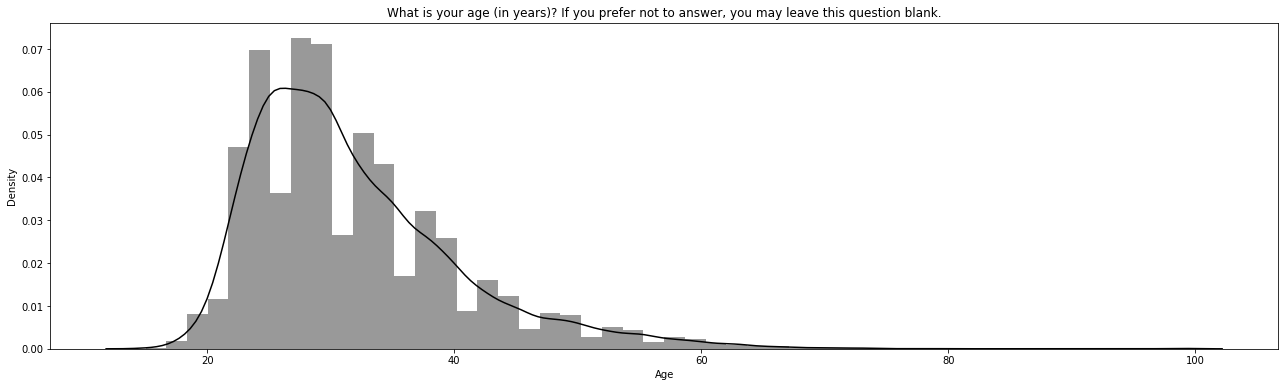

In [20]:
plt.figure(figsize=(22, 6))
sns.distplot(data['Age'], kde=True, color="k")
plt.title(questions.loc['Age', 'QuestionText'])
plt.show()

**Educação**

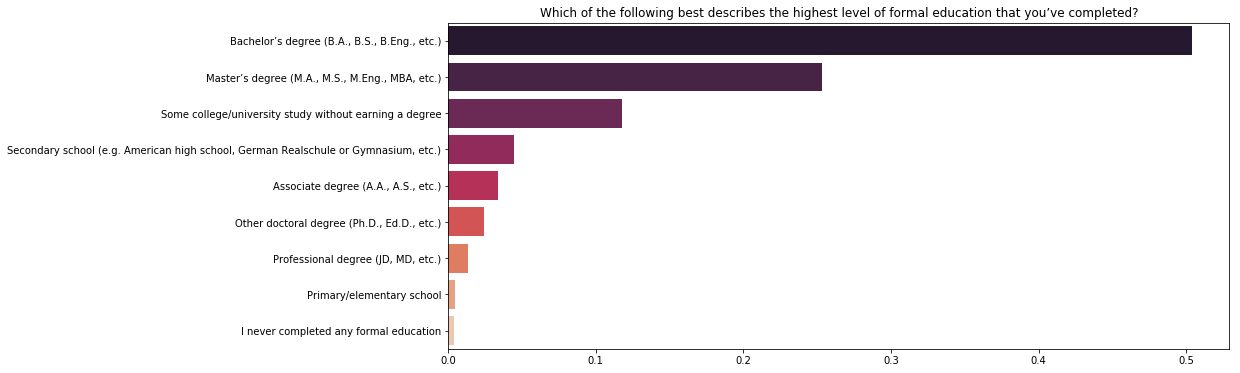

In [21]:
edlevel = data['EdLevel'].value_counts(normalize=True)

plt.figure(figsize=(14, 6))
sns.barplot(edlevel.values, edlevel.index, palette='rocket')
plt.title(questions.loc['EdLevel', 'QuestionText'])
plt.show()

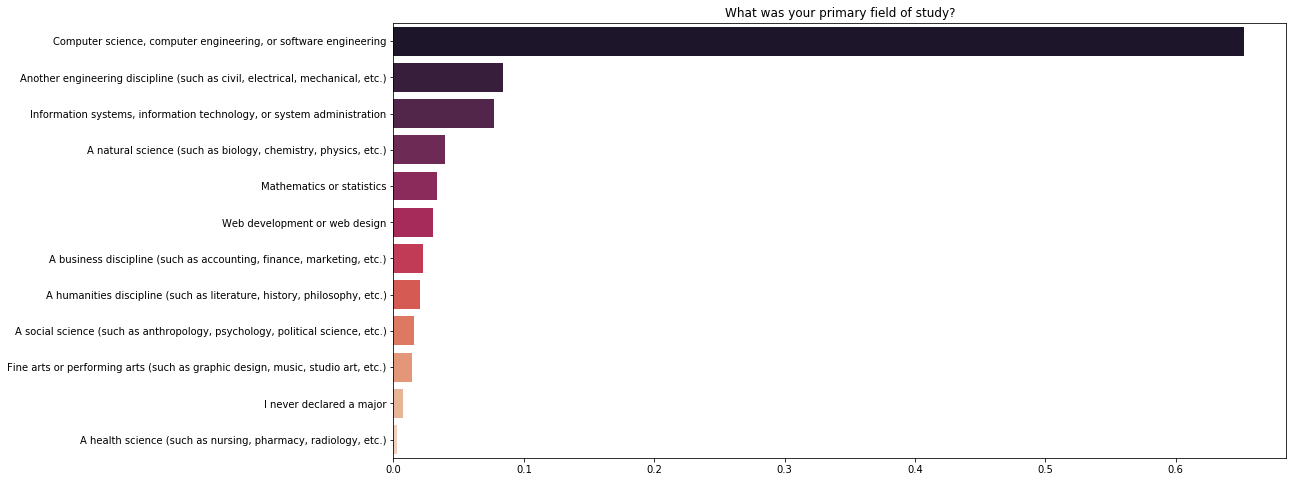

In [22]:
major = data['UndergradMajor'].value_counts(normalize=True)

plt.figure(figsize=(16, 8))
sns.barplot(major.values, major.index, palette='rocket')
plt.title(questions.loc['UndergradMajor', 'QuestionText'])
plt.show()

**Tempo de Experiência Profissional com Programação**

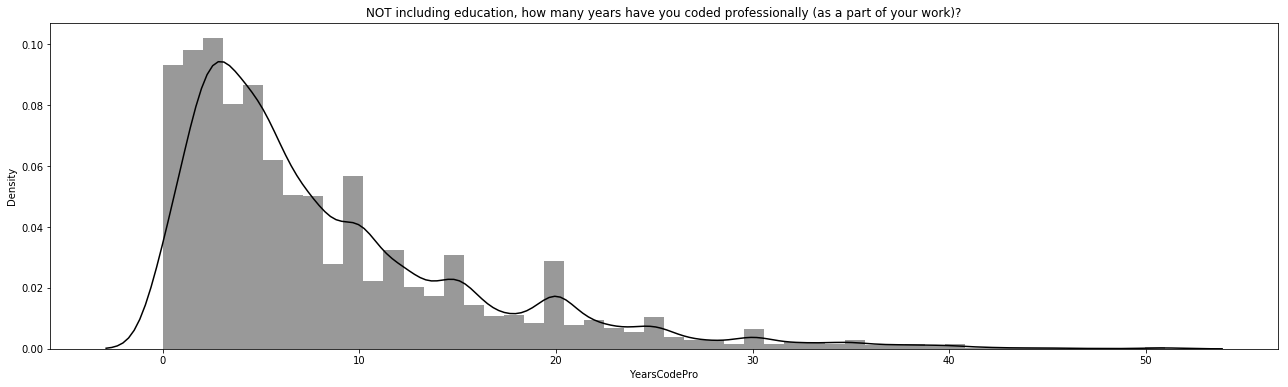

In [23]:
plt.figure(figsize=(22, 6))
sns.distplot(data['YearsCodePro'], kde=True, color="k")
plt.title(questions.loc['YearsCodePro', 'QuestionText'])
plt.show()

In [24]:
data['YearsCodePro'].describe()

count    31720.000000
mean         8.486728
std          7.656754
min          0.000000
25%          3.000000
50%          6.000000
75%         12.000000
max         51.000000
Name: YearsCodePro, dtype: float64

**Área de atuação**

In [25]:
def split_and_plot(feature):
  '''Funcao para fazer o split das respostas e plotar o gráfico 
  para questões tipo marque todas que se aplicam'''

  df = pd.DataFrame(data[feature].str.get_dummies(';').sum())
  df.reset_index(inplace=True)
  df.columns = [feature, 'Total']
  df = df.sort_values('Total', ascending=False)
  
  plt.figure(figsize=(20, 8))
  sns.barplot(x=feature, y='Total', data=df, palette="rocket")
  plt.title(textwrap.fill(questions.loc[feature, 'QuestionText'], width=100))
  plt.xticks(rotation=45, horizontalalignment='right')

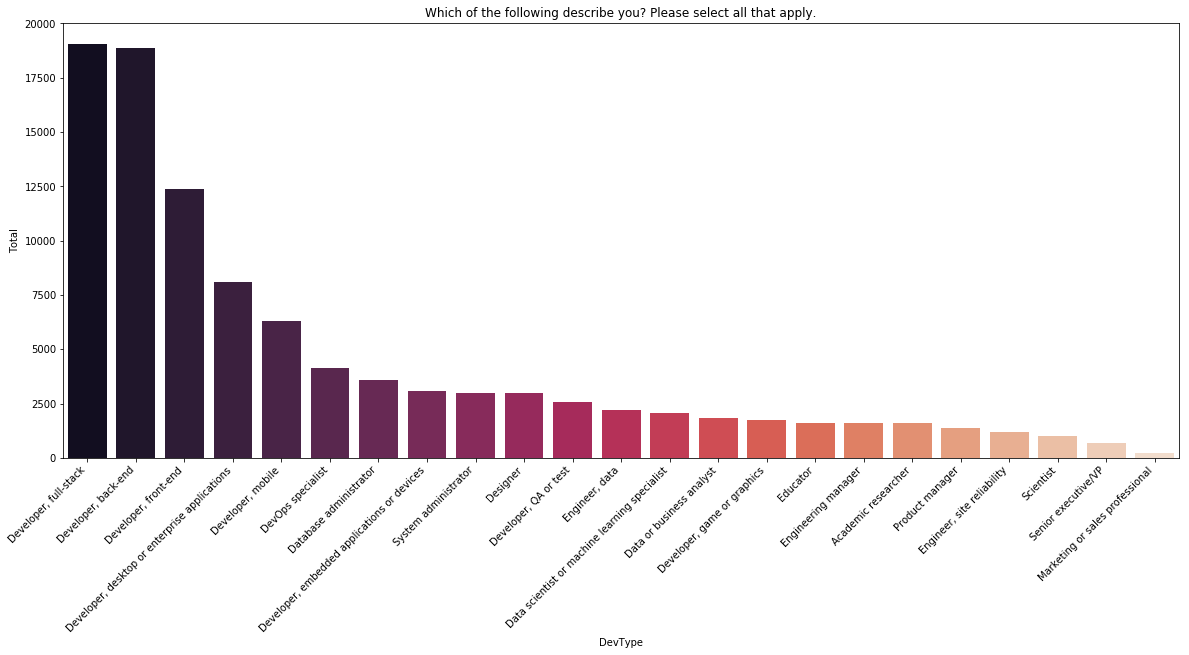

In [26]:
split_and_plot('DevType')

---

**Perfil dos Desenvolvedores**

* Dos desenvolvedores que participaram da pesquisa e atuam profissionalmente na área, a grande maioria é dos **Estados Unidos, seguido de Índia, Reino Unido, Alemanha e Canadá.** O Brasil é o 7º país com o maior número de profissionais devs na pesquisa.    
* A falta de diversidade entre desenvolvedores é bastante visível: entre os participantes da pesquisa, **91% são homens**.    

* As idades dos devs se concentram **entre 23 e 35 anos**, porém temos devs até pouco mais de 60 (em geral, a faixa etária da aposentadoria de grande parte dos profissionais).

* Em relação à formação acadêmica, metade dos desenvolvedores possui, ao menos, o título de bacharel. Destes, 65% são formados em **Ciência da Computação, Engenharia da Computação ou Engenharia de Software**.    

* Analisando o perfil profissional, metade dos respondentes possui **até 6 anos de experiência** (sem considerar o tempo de estudo). Sendo 8.4 a média de anos de experiência profissional na área. 

* Entre as áreas de atuação, as principais são desenvolvimento **full-stack, back-end e front-end**, respectivamente. 



---

### **Linguagens & Tecnologia**

**Linguagens de Programação mais utilizadas**

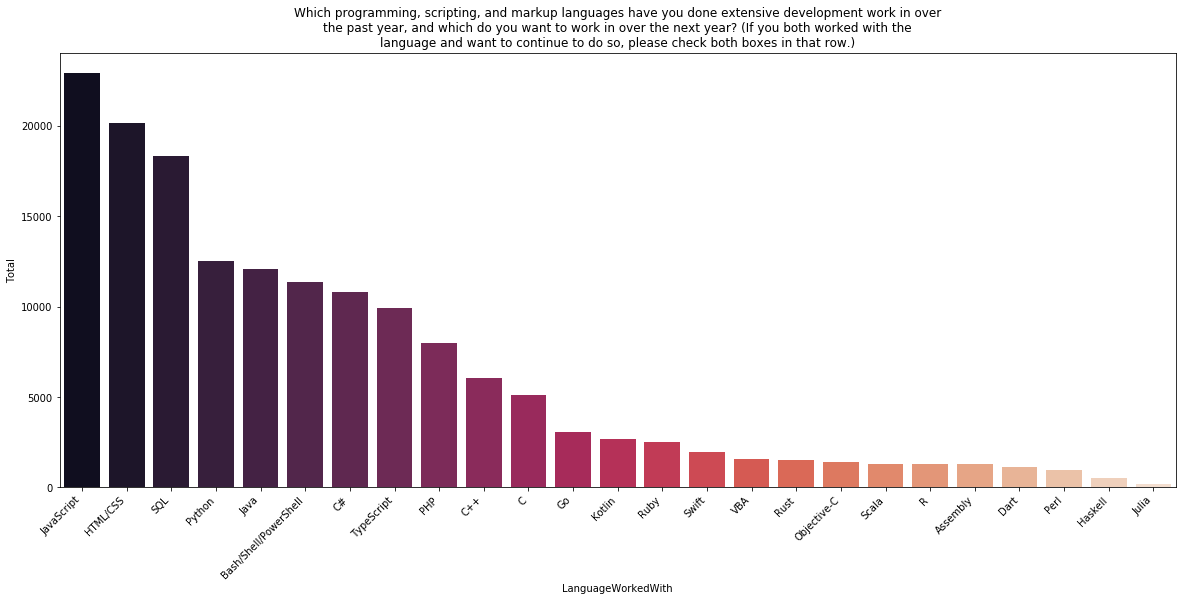

In [27]:
split_and_plot('LanguageWorkedWith')

**Linguagens de programação que deseja utilizar no próximo ano**

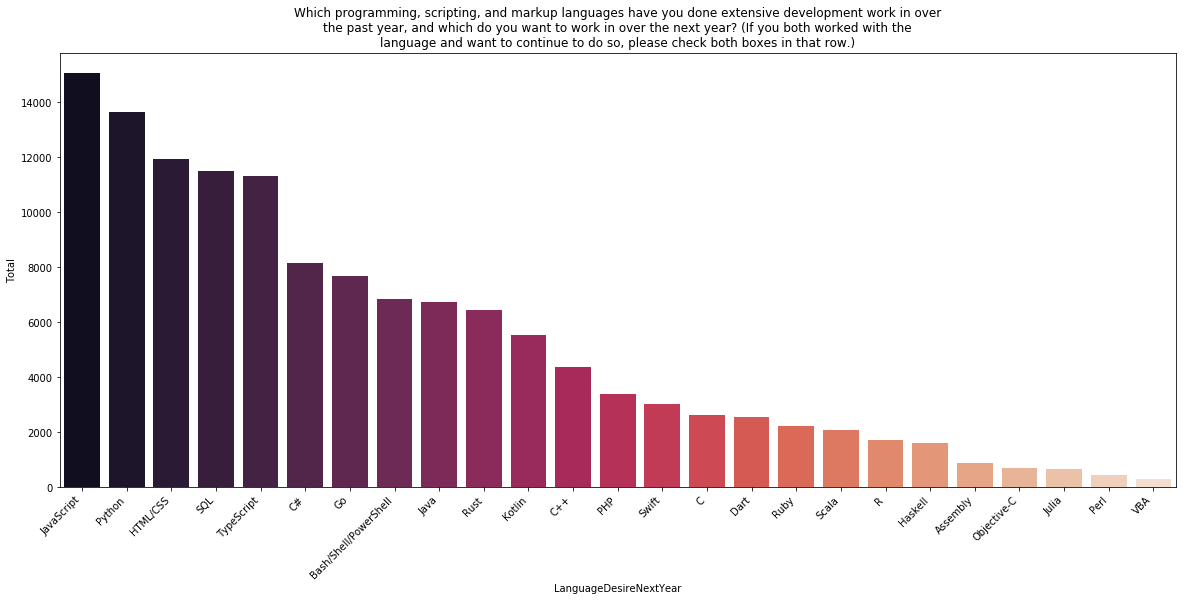

In [28]:
split_and_plot('LanguageDesireNextYear')

**Web frameworks mais utilizados**

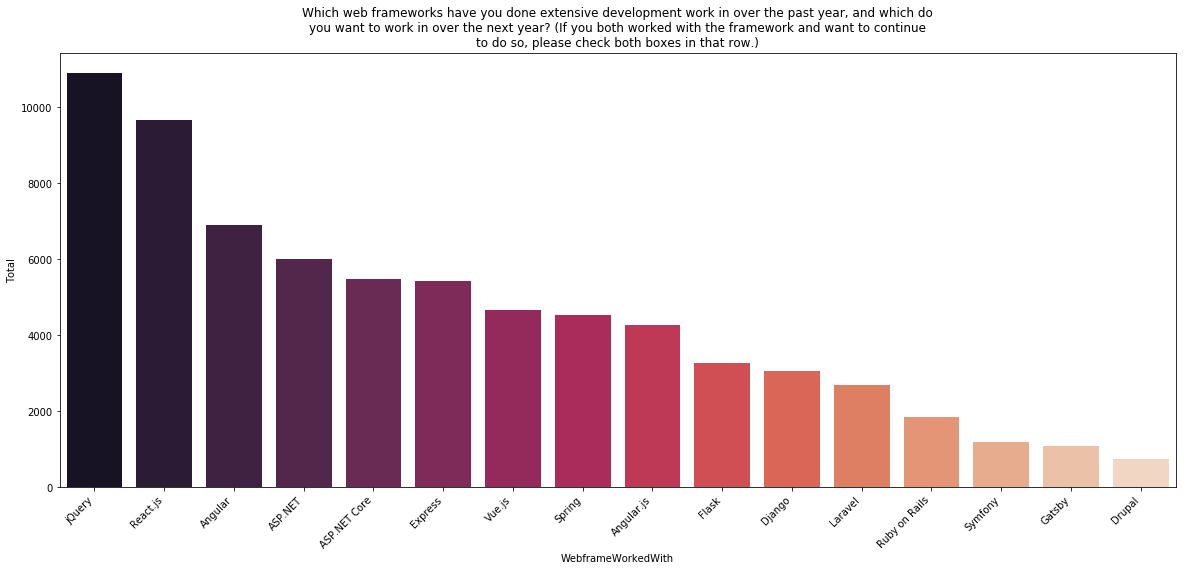

In [29]:
split_and_plot('WebframeWorkedWith')

**Web frameworks que deseja utilizar no próximo ano**


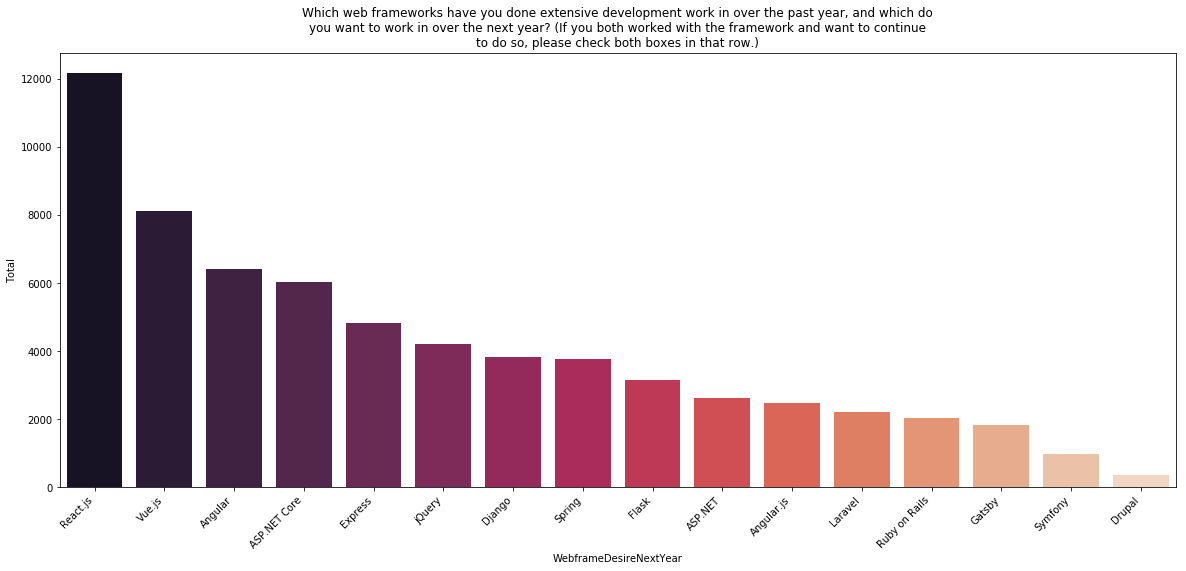

In [30]:
split_and_plot('WebframeDesireNextYear')

**Tecnologias mais utilizadas**

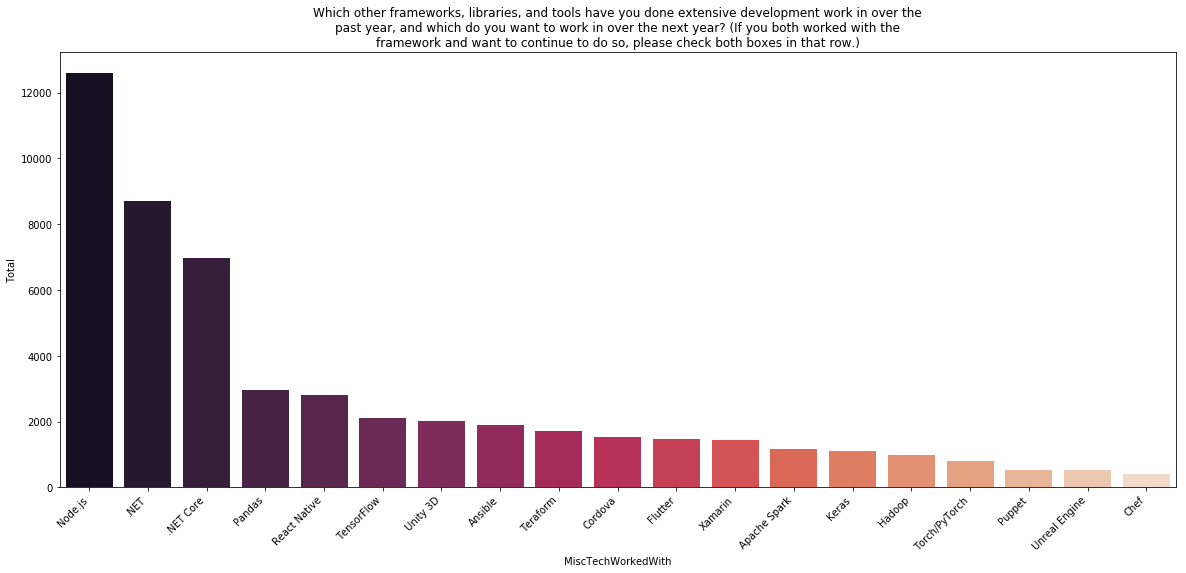

In [31]:
split_and_plot('MiscTechWorkedWith')

**Tecnologias que deseja utilizar no próximo ano**

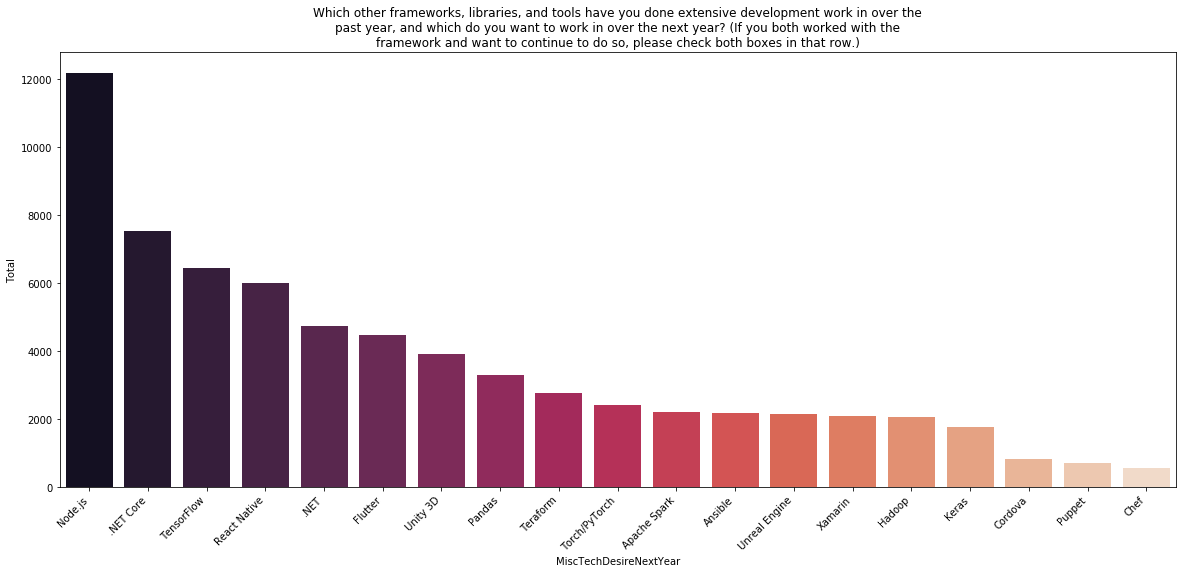

In [32]:
split_and_plot('MiscTechDesireNextYear')

---

* As 5 linguagens mais utilizadas pelos desenvolvedores no último ano foram **Javascript, HTML/CSS, SQL, Python e Java**. 
* Para quem quer entrar na área, vale ficar de olho também nas linguagens que os devs pretendem trabalhar no próximo ano: entre elas estão **Javascript, Python, HTML/CSS, SQL e TypeScript**.

* Com relação aos frameworks, os mais utilizados no último ano foram **jQuery, React.js e Angular**. Entre os mais desejados para trabalhar no próximo ano, **Vue.js** ganha destaque, React.js e Angular se mantém entre as preferidas.   
* Entre as outras tecnologias pesquisadas, **Node.js** foi a mais utilizada e se mantém como a preferida para 2021. 


---

### **Salário dos Desenvolvedores**     

In [33]:
salary = data.loc[:, ['Country', 'DevType', 'Age', 'YearsCodePro', 'Employment', 'WorkWeekHrs', 'AnnualSalaryUSD', 'JobSat']]
salary.replace(0, np.nan, inplace=True)
salary.dropna(inplace=True)
salary.head()

,Country,DevType,Age,YearsCodePro,Employment,WorkWeekHrs,AnnualSalaryUSD,JobSat
Respondent,,,,,,,,
8,United States,"Developer, back-end;Developer, desktop or ente...",36.0,13.0,Employed full-time,39.0,116000.0,Slightly dissatisfied
10,United Kingdom,"Database administrator;Developer, full-stack;D...",22.0,4.0,Employed full-time,36.0,32315.0,Very satisfied
11,United Kingdom,"Developer, back-end;Developer, desktop or ente...",23.0,2.0,Employed full-time,40.0,40070.0,Slightly dissatisfied
12,Spain,"Designer;Developer, front-end",49.0,7.0,Employed full-time,40.0,14268.0,Very dissatisfied
14,United States,"Developer, desktop or enterprise applications;...",27.0,1.0,Employed full-time,40.0,66000.0,Slightly satisfied


Sabemos que salários acima ou abaixo da média do mercado existem, então vamos tratar outliers apenas removendo os valores mais extremos:

In [34]:
print('Salários menores que: USD', data['AnnualSalaryUSD'].quantile(0.05)) # 5% menores salários
print('Salários maiores que: USD', data['AnnualSalaryUSD'].quantile(0.95)) # 5% maiores salários

Salários menores que: USD 5773.800000000001
Salários maiores que: USD 250000.0


In [35]:
# removendo outliers
salary = data.query("AnnualSalaryUSD >= 5773 & AnnualSalaryUSD <= 250000") 

In [36]:
salary.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,24537.0,32.109031,8.237804,15.0,26.0,30.0,36.0,99.0
AnnualSalaryUSD,24537.0,65118.092921,47332.166298,5784.0,28692.0,54289.0,89929.0,250000.0
WorkWeekHrs,24537.0,40.055200,10.106361,1.0,40.0,40.0,41.0,160.0
YearsCodePro,24537.0,8.672780,7.527300,0.0,3.0,6.0,12.0,51.0


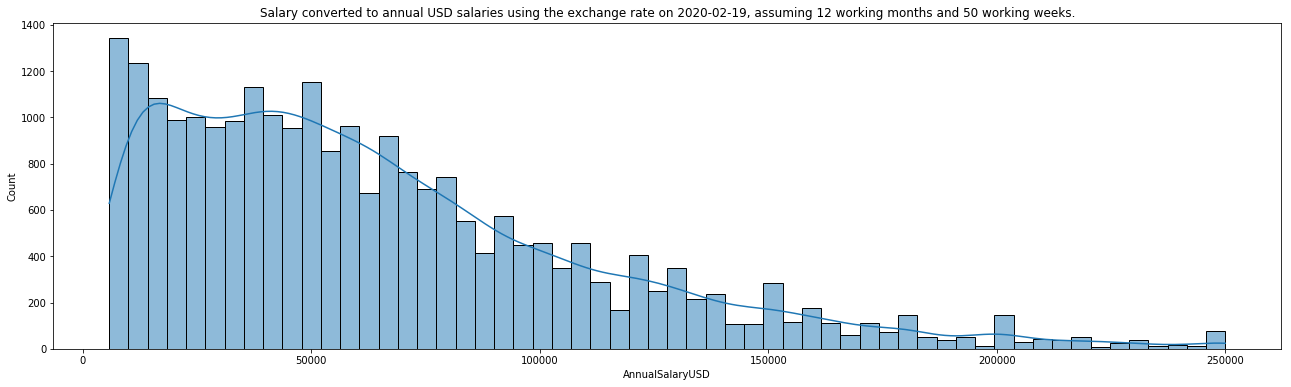

In [37]:
plt.figure(figsize=(22, 6))
sns.histplot(data=salary, x='AnnualSalaryUSD', kde=True)
plt.title(questions.loc['ConvertedComp', 'QuestionText'])
plt.show()

* Analisando a distribuição dos salários dos desenvolvedores, temos uma concentração dos salários de até a faixa dos USD 50k. Importante perceber que os salários bastante altos puxam a média salarial para cima (65k/ano), no entanto metade dos devs ganha até UDS 54.289 ao ano.

**Salários x Tempo de experiência**

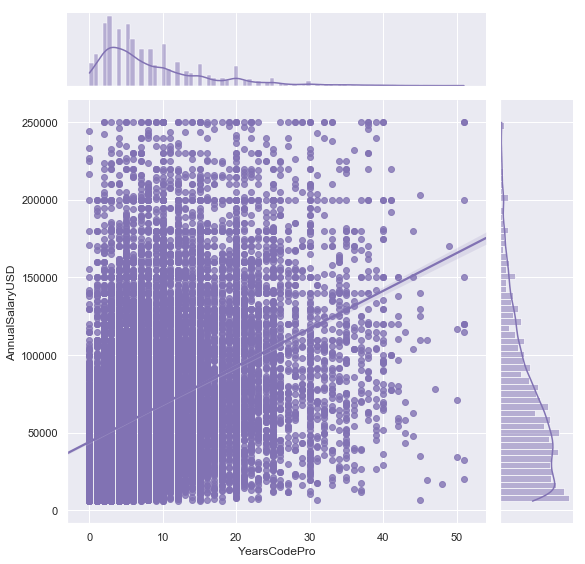

In [38]:
sns.set(style="darkgrid")
sns.jointplot("YearsCodePro","AnnualSalaryUSD", data=salary,
                  kind="reg", truncate=False,
                  color="m", height=8)

* Os anos de experiência profissional têm uma leve correlação positiva com os salários, mas não chega a ser um fator determinante visto que temos profissionais com pouco tempo de experiência e altos salários e vice-versa. 

---

**Comparação salarial por Países**    


Comparando os salários entre os países com mais participantes na pesquisa e o Brasil. Para tentar reduzir o viés da análise, vamos filtrar apenas os salários dos profissionais que se identificam como desenvolvedor e estão empregados em tempo integral com a mesma carga horária:

* Área de atuação: desenvolvimento (Developer)
* Emprego: tempo integral 
* Carga-horária 40h/semana 



In [39]:
# filtra por desenvolvedores 
salary_full = salary.loc[salary['DevType'].str.contains('Developer', na=False)]

# filtra devs empregados em tempo integral (40h/semana)
salary_full = salary.query("Employment == 'Employed full-time' and WorkWeekHrs == 40")

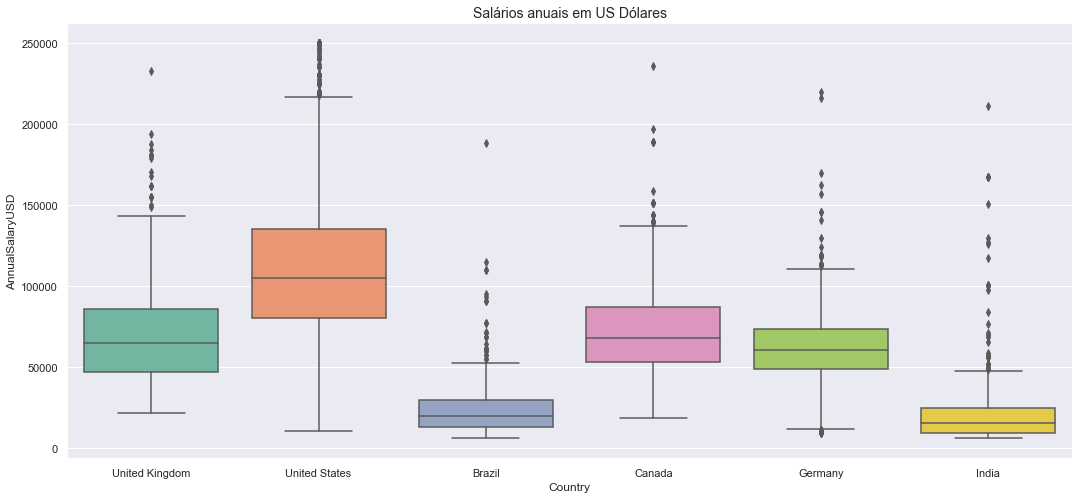

In [40]:
# Selecionando países para comparação
countries = ['United States', 'United Kingdom', 'India', 'Germany', 'Canada', 'Brazil']
filt = salary_full['Country'].isin(countries)
comp_countries = salary_full.loc[filt, ['Country', 'AnnualSalaryUSD']]

# cria o boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x='Country', y='AnnualSalaryUSD', data=comp_countries, palette='Set2')
plt.title('Salários anuais em US Dólares', fontsize=14)
plt.show()

* Apesar dos EUA chamarem a atenção com a os salários mais altos, a variação entre o maior e menor salário é muito maior. O menor salário dos EUA, por exemplo, é mais baixo que os menores salários no Canadá e Reino Unido. 

* Índia e Brasil têm menor variação salarial, mas a desvalorização do real e da rupia indiana frente ao dólar deixa as médias salariais muito abaixo na comparação com os demais países.

* UK e Canadá parecem boas opções para profissionais em início de carreira, visto que mesmo os menores salários ainda são melhores que os menores salários dos outros países.    
    

*** 1 Dólar Americano = 4,4723 Reais Brasileiros em 28/02/2020

---

### **Satisfação com o Trabalho**
  

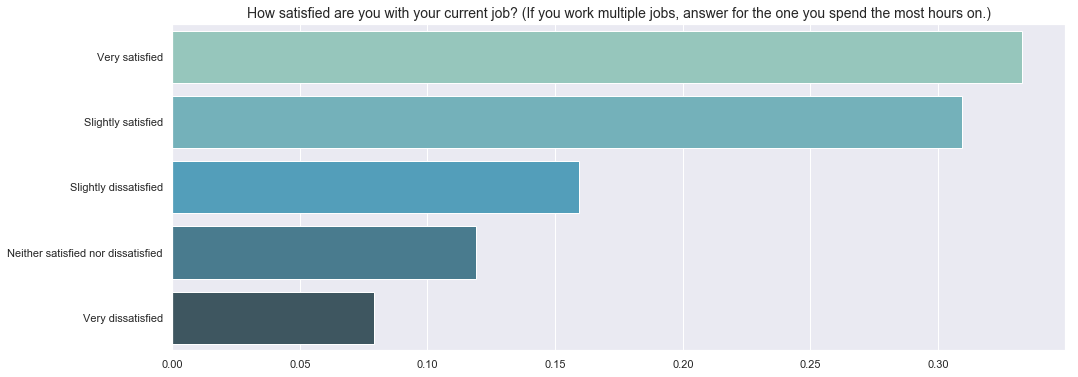

In [41]:
job_sat = data['JobSat'].value_counts(normalize=True)

plt.figure(figsize=(16, 6))
sns.barplot(job_sat.values, job_sat.index, palette='GnBu_d')
plt.title(questions.loc['JobSat', 'QuestionText'], fontsize=14)
plt.show()

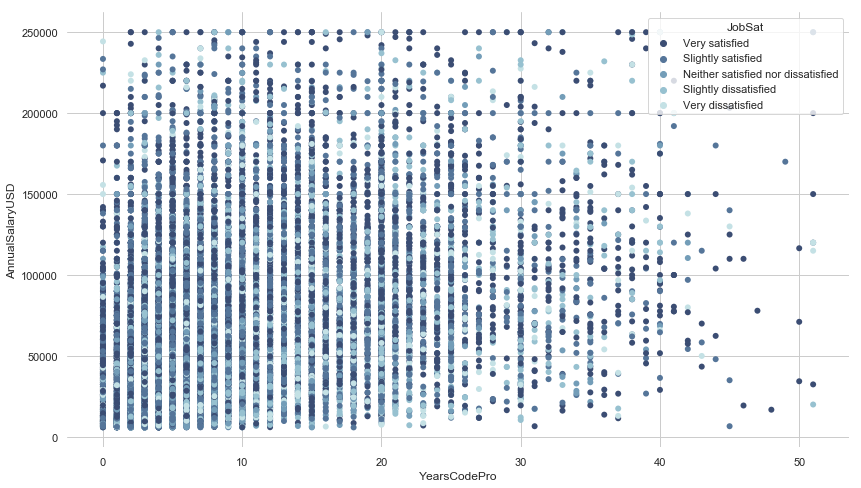

In [42]:
# cria um scatter plot com pontos de cores diferentes para o grau de satisfação
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(14, 8))
sns.despine(f, left=True, bottom=True)
sat_ranking = ["Very satisfied", "Slightly satisfied", "Neither satisfied nor dissatisfied", "Slightly dissatisfied", "Very dissatisfied"]
sns.scatterplot(x="YearsCodePro", y="AnnualSalaryUSD", hue="JobSat", palette="ch:r=-.2,d=.3_r", hue_order=sat_ranking, linewidth=0, data=salary, ax=ax)

* Os diferentes graus de satisfação estão bem misturados no gráfico, o que indica que os devs com os maiores salários não necessariamente são os mais satisfeitos e vice-versa. Mas então, quais os outros fatores de trabalho importantes para os desenvolvedores? 



**Fatores Importantes no Trabalho**    
Em uma situação com duas ofertas de emprego, na mesma região e com o mesmo salário e benefícios. Quais os fatores mais importantes para para a decisão?

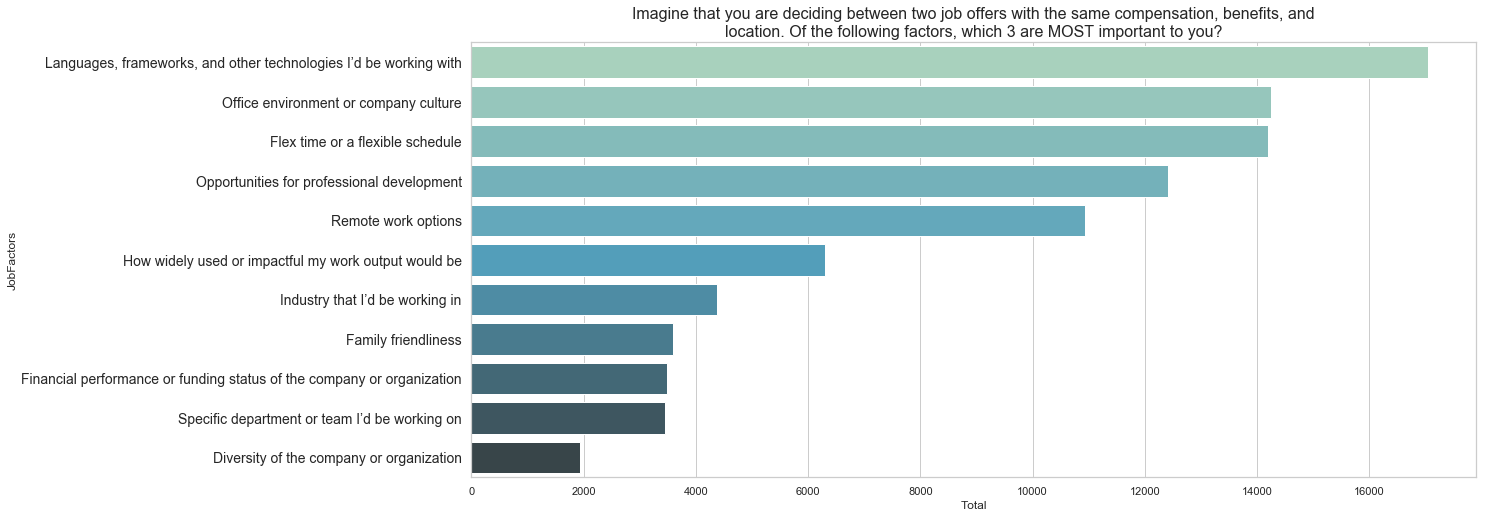

In [43]:
# extrai as opções de cada resposta e cria um df
job_factors = pd.DataFrame(data['JobFactors'].str.get_dummies(';').sum())
job_factors.reset_index(inplace=True)
job_factors.columns = ['JobFactors', 'Total']
job_factors = job_factors.sort_values('Total', ascending=False)

# plota o gráfico
plt.figure(figsize=(18, 8))
sns.barplot(x='Total', y='JobFactors', data=job_factors, palette="GnBu_d")
plt.title(textwrap.fill(questions.loc['JobFactors', 'QuestionText'], width=100), fontsize=16)
plt.yticks(fontsize=14)
plt.show()

Salário é importante? É! Mas existem outros fatores que pesam na decisão dos desenvolvedores na hora de decidir sobre uma proposta de trabalho. Entre os principais citados estão **as tecnologias que serão utilizadas, o ambiente de trabalho ou cultura da empresa e a flexibilidade de horário**. 

---

In [44]:
# author: @priscillapreks
# 01.04.2020